In [7]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


In [91]:
list=[]
username='ctalhaahmad'
scrapper = sntwitter.TwitterProfileScraper(username)
try:
        user = scrapper.entity
        # declare a username
        # for i, tweet in enumerate(scrapper.get_items()):
        list.append([user.username, user.id, user.displayname,
                     user.renderedDescription, user.verified, user.created,
                     user.followersCount, user.friendsCount, user.statusesCount,
                     user.favouritesCount, user.listedCount, user.mediaCount, user.location,
                     user.protected, user.link, user.profileImageUrl])
          # break

except:
        print('fail')

user_df = pd.DataFrame(list, columns=['username', 'id', 'displayname',
                                          'renderedDescription', 'verified', 'created',
                                          'followersCount', 'friendsCount', 'statusesCount',
                                          'favouritesCount', 'listedCount', 'mediaCount', 'location',
                                          'protected', 'link', 'profileImageUrl'])


In [92]:
user_df

,username,id,displayname,renderedDescription,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,link,profileImageUrl
0,ctalhaahmad,911924725378686976,Muhammad Zain,☕ I love being a digital normad at cozy cafes\...,False,2017-09-24 12:06:12+00:00,220,41,392,357,0,0,🇵🇰 Toba Tek Singh,False,"TextLink(text='zainahsan.com', url='http://zai...",https://pbs.twimg.com/profile_images/156526963...


In [89]:

tweets_list2 = []

for i, tweet in enumerate(sntwitter.TwitterProfileScraper('ctalhaahmad').get_items()):

    if i % 100 == 0:
        print(i)

    if i > 100:
        print(i)
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.rawContent, tweet.username, tweet.lang,
                        tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media])


AttributeError: 'NoneType' object has no attribute 'id'

In [94]:
tweets_list1 = []
# data=datetime()
current_time = datetime.datetime.now()
justOneYear=False
# declare a username
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('from:ctalhaahmad').get_items()):
    
    if (justOneYear==True):
        if ((current_time.year-tweet.date.year)):
            print('year end')
            break

    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
                        tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media])
# tweet.
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Language',

                'Hashtags','ReplyCount','RetweetCount','LikeCount','QuoteCount','Media'])

In [95]:
# tweets_df1
current_time = datetime.datetime.now()
if ( (current_time.year-date.year)):
    print('samer not year')
tweets_df1

AttributeError: 'datetime.timedelta' object has no attribute 'year'

In [96]:

tweets_df1['Hour'] = tweets_df1['DateTime'].dt.hour

tweets_df1['Year'] = tweets_df1['DateTime'].dt.year 

tweets_df1['Month'] = tweets_df1['DateTime'].dt.month

tweets_df1['MonthName'] = tweets_df1['DateTime'].dt.month_name()

tweets_df1['MonthDay'] = tweets_df1['DateTime'].dt.day

tweets_df1['DayName'] = tweets_df1['DateTime'].dt.day_name()

tweets_df1['Week'] = tweets_df1['DateTime'].dt.isocalendar().week

tweets_df1['Date'] = [d.date() for d in tweets_df1['DateTime']]

tweets_df1['Time'] = [d.time() for d in tweets_df1['DateTime']]


In [97]:
tweets_df1
date = datetime.datetime.now().date()-user_df['created'][0].date()
date.days

1926

In [98]:
days = datetime.datetime.now().date()-user_df['created'][0].date()
days=days.days
user_df['tweetsPerWeek'] = tweets_df1.count()[0] / (days/7)
user_df['tweetsPerMonth'] = tweets_df1.count()[0] / (days/30)
user_df['tweetsPerYear'] = tweets_df1.count()[0] / (days/365)
user_df

,username,id,displayname,renderedDescription,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,link,profileImageUrl,tweetsPerWeek,tweetsPerMonth,tweetsPerYear
0,ctalhaahmad,911924725378686976,Muhammad Zain,☕ I love being a digital normad at cozy cafes\...,False,2017-09-24 12:06:12+00:00,220,41,392,357,0,0,🇵🇰 Toba Tek Singh,False,"TextLink(text='zainahsan.com', url='http://zai...",https://pbs.twimg.com/profile_images/156526963...,0.396158,1.697819,20.656802


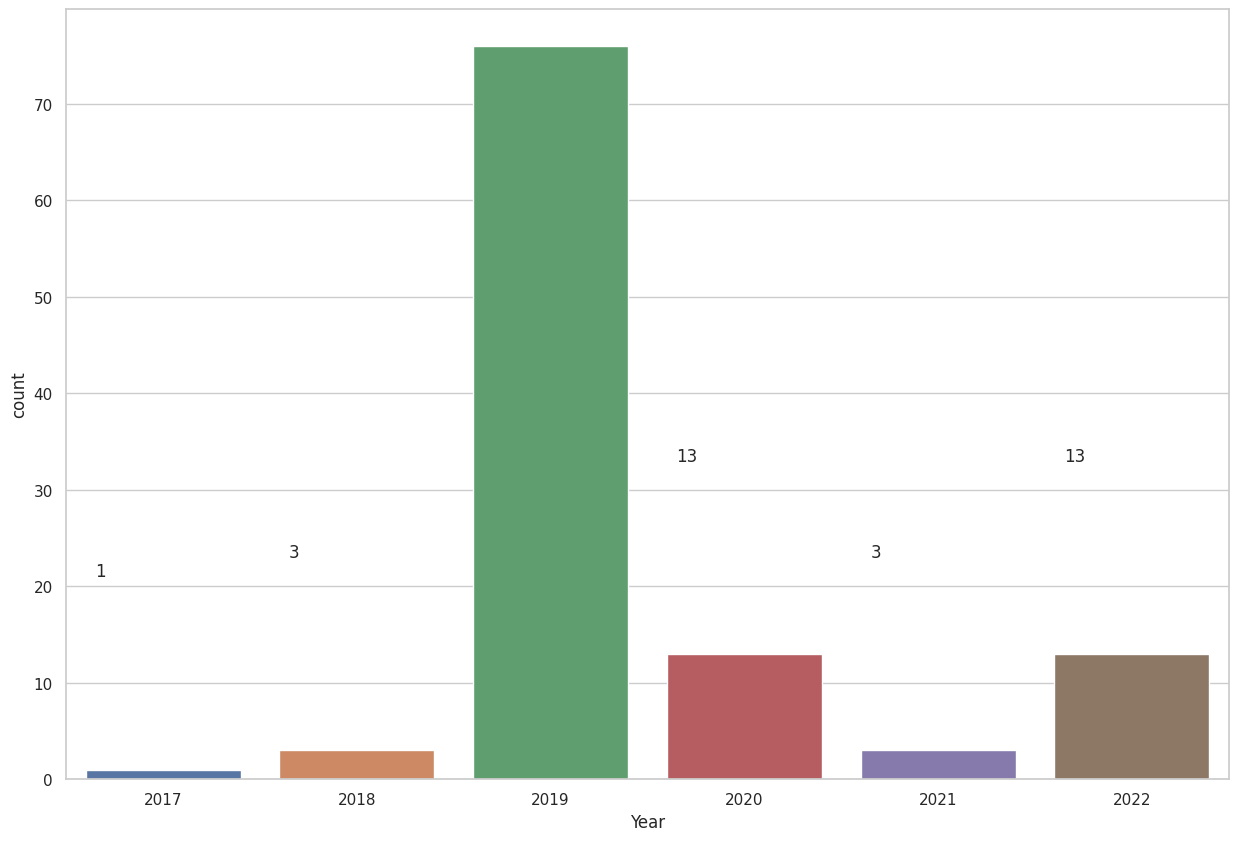

In [101]:
f, ax = plt.subplots(figsize=(15, 10))

sns.countplot(x=tweets_df1['Year'])

for p in ax.patches:
    

    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize=12)


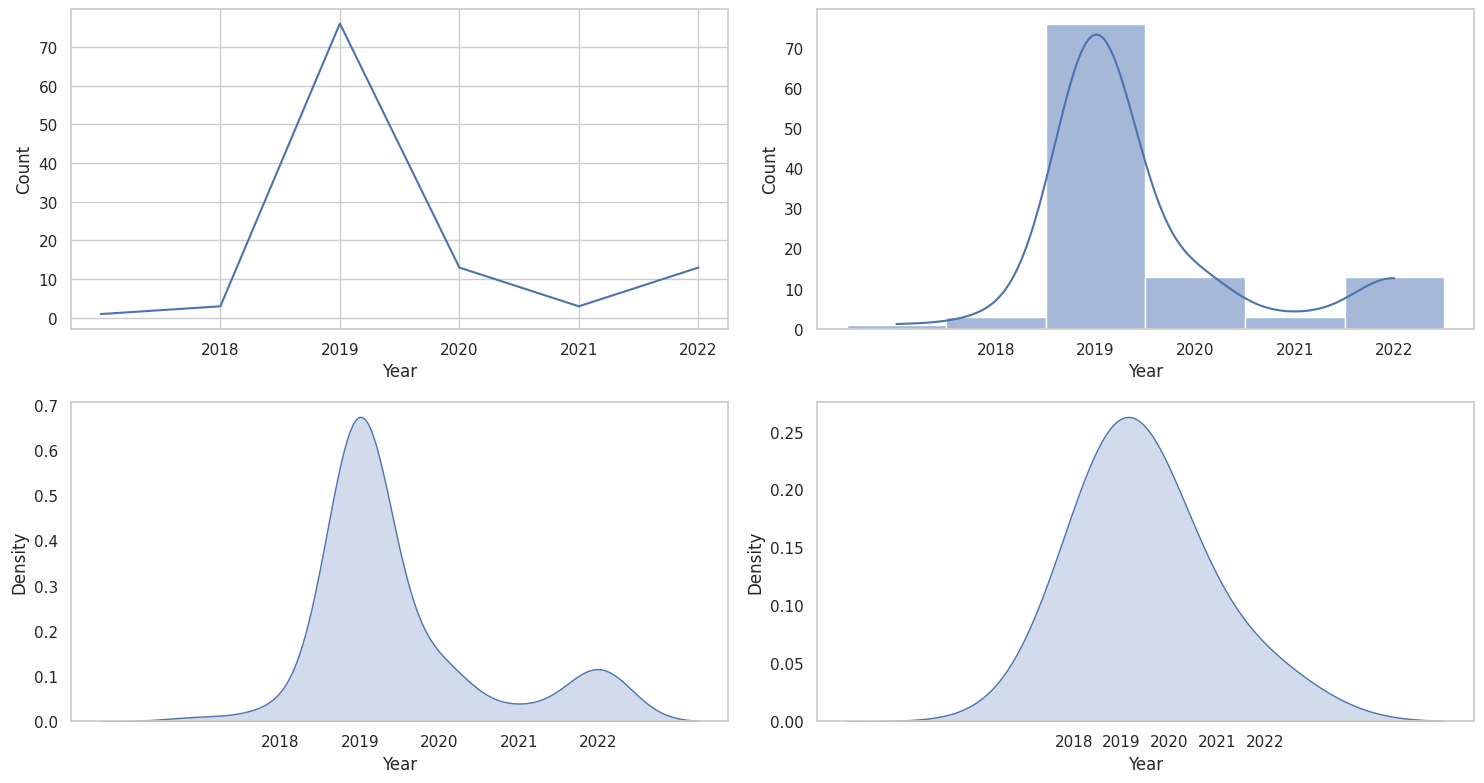

In [102]:

plt.figure(figsize=(15, 8))

ax = plt.subplot(221)

sns.lineplot(tweets_df1.Year.value_counts())

ax.set_xlabel("Year")

ax.set_ylabel('Count')

plt.xticks(np.arange(2018, 2023, 1))

plt.subplot(222)

sns.histplot(x=tweets_df1.Year, stat='count', binwidth=1, kde='true', discrete=True)

plt.xticks(np.arange(2018, 2023, 1))

plt.grid()

plt.subplot(223)

sns.kdeplot(x=tweets_df1.Year, fill=True)

plt.xticks(np.arange(2018, 2023, 1))

plt.grid()

plt.subplot(224)

sns.kdeplot(x=tweets_df1.Year, fill=True, bw_adjust=3)

plt.xticks(np.arange(2018, 2023, 1))

plt.grid()

plt.tight_layout()

plt.show()
